# Análisis de datos médicos con aprendizaje no supervisado

Juan Pablo Valenzuela Dorado - A00227321, Juan Pablo Bernal Lafarga - A01742342, Francelio Uriel Rodríguez García - A01352663


# Búsqueda de una base de datos médicos o experimentales

1. Busca un conjunto de datos con la cual puedas llevar a cabo tu proyecto. Para ello, se te sugiere cualquiera de las dos alternativas:

        *En el sitio Kaggle selecciona una base de datos relacionada a la salud a la cuál se le pueda aplicar modelos de agrupamiento.
    
        *Algún conjunto de datos que obtivista en tu proyecto anterior de este curso (por ejemplo, el de tareas cognitivas). 

In [10]:
import pandas as pd
data = pd.read_csv('diabetic_data.csv')
# Eliminar la penúltima columna
data = data.drop(data.columns[-2], axis=1)

# Select relevant features for clustering
features = ['num_lab_procedures', 'num_medications']
X = data[features].values

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

2. ¿Por qué consideran que la base de datos que seleccionaron es adecuada para agrupamiento?

La base de datos "Diabetes 130 US hospitals for years 1999-2008" es un conjunto de datos que abarca un período de 10 años de atención clínica en 130 hospitales y redes de entrega integradas en los Estados Unidos. Esta base de datos incluye más de 50 características que representan tanto los resultados de los pacientes como los datos del hospital. Ofrece una amplia variedad de atributos relacionados con los pacientes, como información demográfica, detalles sobre medicamentos, procedimientos médicos, resultados de pruebas de laboratorio, duración de la estancia hospitalaria, entre otros.

Esta diversidad de datos nos permite explorar diferentes dimensiones y aspectos relacionados con la diabetes y la atención médica. Al analizar estos datos, es posible identificar patrones y grupos similares entre los pacientes. Esto es especialmente útil para aplicar algoritmos de agrupamiento, ya que pueden ayudarnos a descubrir subgrupos de pacientes con perfiles similares. Estos grupos podrían proporcionar información valiosa sobre diferentes características y resultados médicos, lo que podría ser útil para la toma de decisiones clínicas y el diseño de estrategias de tratamiento más personalizadas.

# Búsqueda de patrones con modelos de agrupamiento

In [17]:
import matplotlib.pyplot as plt

X = data[features].values

def plot_data(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

1. Utiliza el algoritmo k-medias para buscar posibles grupos de observaciones en la base de datos que seleccionaron.

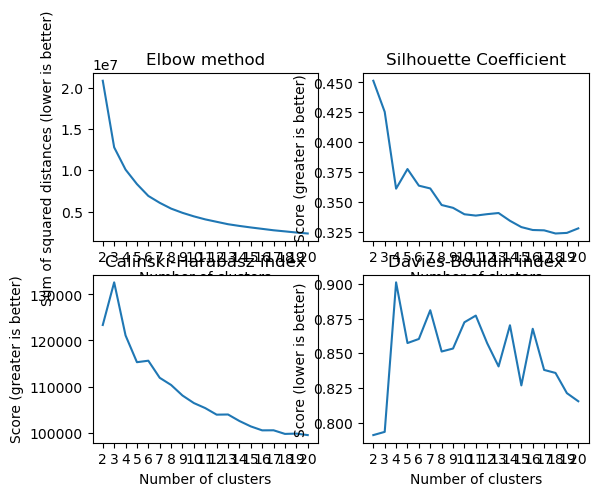

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k).fit(X)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(X, kmeans.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(X, kmeans.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(X, kmeans.labels_))

fig, axs = plt.subplots(2, 2)

axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')    
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')    
axs[0][1].set_title('Silhouette Coefficient')    
axs[0][1].set_xticks(ks)

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')    
axs[1][0].set_title('Calinski-Harabasz index')    
axs[1][0].set_xticks(ks)

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')    
axs[1][1].set_title('Davies-Bouldin index')    
axs[1][1].set_xticks(ks)

plt.show()

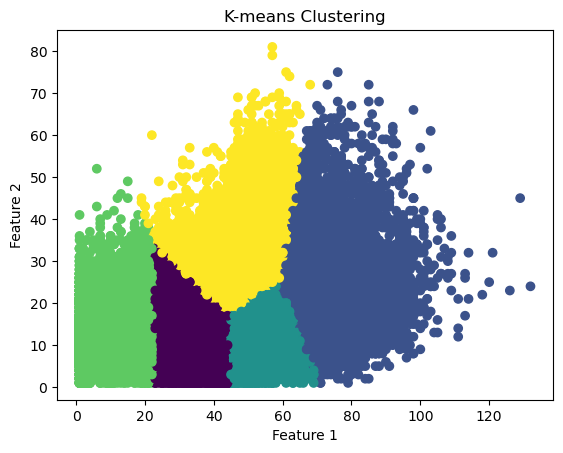

In [18]:
# K-means
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
clustering_labels = kmeans.labels_
plot_data(X, clustering_labels, 'K-means Clustering')

## Cluster 0

In [ ]:
Xkmeans = data
Xkmeans['etiquetas_columna'] = clustering_labels
grupos = Xkmeans.groupby('etiquetas_columna')
grupo_0 = grupos.get_group(0)
grupo_0.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,2.351000e+04,2.351000e+04,23510.000000,23510.00000,23510.000000,23510.000000,23510.000000,23510.000000,23510.000000,23510.000000,23510.000000,23510.000000,23510.000000,23510.0
mean,1.686422e+08,5.922245e+07,1.825308,3.64530,6.361548,5.258783,64.283709,1.168822,16.563505,0.401361,0.206550,0.704041,7.927690,0.0
std,1.057899e+08,3.933241e+07,1.515493,4.93636,3.286734,2.897042,8.825824,1.559583,4.302311,1.340095,0.909092,1.323422,1.636823,0.0
min,3.690000e+04,7.290000e+02,1.000000,1.00000,1.000000,1.000000,49.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,8.120238e+07,2.420614e+07,1.000000,1.00000,7.000000,3.000000,58.000000,0.000000,13.000000,0.000000,0.000000,0.000000,7.000000,0.0
50%,1.601920e+08,6.001542e+07,1.000000,1.00000,7.000000,5.000000,63.000000,1.000000,16.000000,0.000000,0.000000,0.000000,9.000000,0.0
75%,2.399813e+08,9.048015e+07,2.000000,4.00000,7.000000,7.000000,69.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.0
max,4.438475e+08,1.894815e+08,8.000000,28.00000,25.000000,14.000000,132.000000,6.000000,27.000000,38.000000,54.000000,19.000000,16.000000,0.0


## Cluster 1

In [ ]:
grupo_1 = grupos.get_group(1)
grupo_1.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,1.702000e+04,1.702000e+04,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.00000,17020.000000,17020.000000,17020.000000,17020.0
mean,1.727289e+08,5.798948e+07,2.502526,3.402585,6.419565,3.115981,11.866627,1.169036,11.849765,0.43302,0.213866,0.525734,7.121622,1.0
std,1.052705e+08,3.834410e+07,1.491872,5.142642,5.688399,2.347769,8.654167,1.569336,4.631778,1.35186,1.053912,1.171466,2.025634,0.0
min,6.441000e+04,1.629000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,1.0
25%,9.359594e+07,2.479105e+07,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,9.000000,0.00000,0.000000,0.000000,6.000000,1.0
50%,1.446682e+08,4.490166e+07,2.000000,1.000000,7.000000,3.000000,11.000000,1.000000,12.000000,0.00000,0.000000,0.000000,8.000000,1.0
75%,2.465767e+08,8.952845e+07,3.000000,3.000000,7.000000,4.000000,19.000000,2.000000,15.000000,0.00000,0.000000,1.000000,9.000000,1.0
max,4.438672e+08,1.892578e+08,8.000000,28.000000,22.000000,14.000000,28.000000,6.000000,28.000000,42.00000,64.000000,16.000000,16.000000,1.0


## Cluster 2

In [ ]:
grupo_2= grupos.get_group(2)
grupo_2.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,2.184000e+04,2.184000e+04,21840.000000,21840.000000,21840.000000,21840.000000,21840.000000,21840.000000,21840.000000,21840.000000,21840.000000,21840.000000,21840.000000,21840.0
mean,1.719209e+08,5.279200e+07,2.162637,3.991575,5.219643,4.787546,38.099084,1.673901,20.909524,0.408104,0.219231,0.757189,7.674863,2.0
std,1.004228e+08,3.704259e+07,1.402220,5.471933,4.367632,2.879211,9.609590,1.729174,4.012454,1.270314,0.921487,1.370965,1.789179,0.0
min,1.573800e+04,7.740000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,2.0
25%,9.837841e+07,2.373301e+07,1.000000,1.000000,1.000000,3.000000,32.000000,0.000000,18.000000,0.000000,0.000000,0.000000,6.000000,2.0
50%,1.581950e+08,4.289535e+07,2.000000,1.000000,7.000000,4.000000,39.000000,1.000000,20.000000,0.000000,0.000000,0.000000,9.000000,2.0
75%,2.334644e+08,8.552388e+07,3.000000,6.000000,7.000000,6.000000,45.000000,3.000000,24.000000,0.000000,0.000000,1.000000,9.000000,2.0
max,4.438572e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,57.000000,6.000000,41.000000,36.000000,63.000000,15.000000,16.000000,2.0


## Cluster 3

In [ ]:
grupo_3= grupos.get_group(3)
grupo_3.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,8.071000e+03,8.071000e+03,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.0
mean,1.784409e+08,5.622720e+07,2.145459,5.150787,5.140999,7.984389,60.849089,3.081650,34.268492,0.442696,0.195639,0.694338,8.250650,3.0
std,1.054898e+08,3.797405e+07,1.447008,6.050915,3.972825,3.159495,14.507214,2.039972,7.876991,1.577854,0.780976,1.301459,1.432234,0.0
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,6.000000,0.000000,26.000000,0.000000,0.000000,0.000000,2.000000,3.0
25%,9.414698e+07,2.404512e+07,1.000000,1.000000,1.000000,6.000000,51.000000,1.000000,29.000000,0.000000,0.000000,0.000000,8.000000,3.0
50%,1.655139e+08,4.773891e+07,2.000000,3.000000,7.000000,8.000000,60.000000,3.000000,32.000000,0.000000,0.000000,0.000000,9.000000,3.0
75%,2.481720e+08,8.678822e+07,3.000000,6.000000,7.000000,10.000000,71.000000,5.000000,37.000000,0.000000,0.000000,1.000000,9.000000,3.0
max,4.438420e+08,1.891954e+08,8.000000,28.000000,20.000000,14.000000,129.000000,6.000000,81.000000,40.000000,22.000000,14.000000,16.000000,3.0


## Cluster 4

In [ ]:
grupo_4= grupos.get_group(4)
grupo_4.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,3.132500e+04,3.132500e+04,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.0
mean,1.504338e+08,4.925458e+07,1.785188,3.376377,5.468316,3.246353,43.070838,0.878947,9.773121,0.264836,0.168236,0.543911,6.817845,4.0
std,9.784330e+07,3.902707e+07,1.309883,5.182207,3.116055,2.260307,8.620764,1.422373,3.268067,1.045891,0.915665,1.159605,2.078146,0.0
min,1.668000e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.0
25%,7.510490e+07,1.417863e+07,1.000000,1.000000,1.000000,2.000000,37.000000,0.000000,7.000000,0.000000,0.000000,0.000000,5.000000,4.0
50%,1.396687e+08,4.202797e+07,1.000000,1.000000,7.000000,3.000000,43.000000,0.000000,10.000000,0.000000,0.000000,0.000000,7.000000,4.0
75%,2.021168e+08,8.558194e+07,2.000000,3.000000,7.000000,4.000000,49.000000,1.000000,12.000000,0.000000,0.000000,1.000000,9.000000,4.0
max,4.438541e+08,1.893659e+08,8.000000,28.000000,22.000000,14.000000,72.000000,6.000000,15.000000,35.000000,76.000000,21.000000,16.000000,4.0


2. Utiliza otros dos algoritmos de agrupamiento distintos a k-medias y agrupamiento jerárquico, y repite el paso anterior.

d:\Nueva carpeta\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
d:\Nueva carpeta\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
d:\Nueva carpeta\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
d:\Nueva carpeta\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
d:\Nueva carpeta\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
d:\Nueva carpeta\lib\site-packages\sklearn\manifold\_spectral_embedding.py:

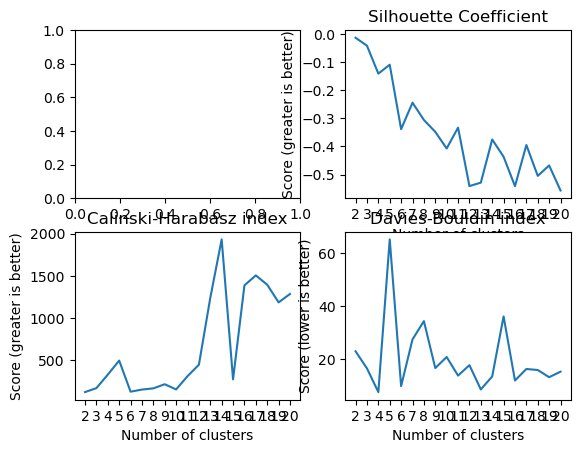

In [21]:
# Agrupamiento espectral
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=0).fit(X)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(X, spectral.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(X, spectral.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(X, spectral.labels_))

fig, axs = plt.subplots(2, 2)

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')    
axs[0][1].set_title('Silhouette Coefficient')    
axs[0][1].set_xticks(ks)

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')    
axs[1][0].set_title('Calinski-Harabasz index')    
axs[1][0].set_xticks(ks)

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')    
axs[1][1].set_title('Davies-Bouldin index')    
axs[1][1].set_xticks(ks)

plt.show()

d:\Nueva carpeta\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


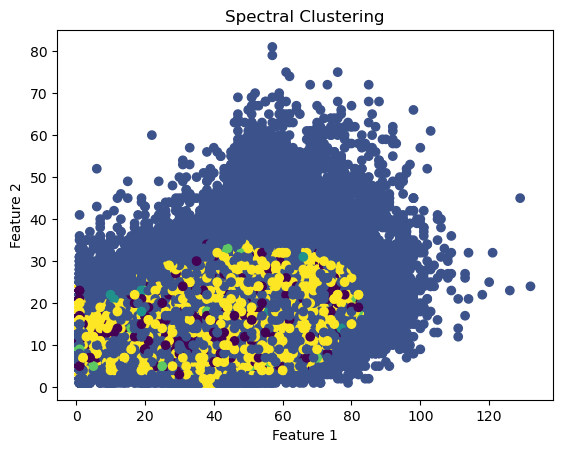

In [22]:
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=0)
clustering_labels = spectral.fit_predict(X)  # Corrección: utilizar spectral.fit_predict(X)
plot_data(X, clustering_labels, 'Spectral Clustering')

In [ ]:
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=0)
clustering_labels = spectral.fit_predict(X)  # Corrección: utilizar spectral.fit_predict(X)

C:\Users\Juani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


## Cluster 0

In [ ]:
Xspectral = data
Xspectral['etiquetas_columna'] = clustering_labels
grupos = Xspectral.groupby('etiquetas_columna')
grupo_0 = grupos.get_group(0)
grupo_0.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,1.018500e+04,1.018500e+04,10185.000000,10185.000000,10185.000000,10185.000000,10185.000000,10185.000000,10185.000000,10185.000000,10185.000000,10185.000000,10185.000000,10185.0
mean,1.677180e+08,5.483649e+07,2.019244,3.653805,5.780363,4.439666,42.993814,1.357585,16.291703,0.410309,0.202356,0.653608,7.476583,0.0
std,1.022919e+08,3.857392e+07,1.441182,5.238699,4.115402,2.934329,19.772823,1.672160,6.793052,1.338824,0.925332,1.298979,1.921645,0.0
min,4.092600e+04,1.305000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,8.796186e+07,2.357154e+07,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.0
50%,1.556702e+08,4.560448e+07,1.000000,1.000000,7.000000,4.000000,41.000000,1.000000,16.000000,0.000000,0.000000,0.000000,9.000000,0.0
75%,2.340579e+08,8.752224e+07,3.000000,3.000000,7.000000,6.000000,60.000000,2.000000,21.000000,0.000000,0.000000,1.000000,9.000000,0.0
max,4.438423e+08,1.891695e+08,8.000000,28.000000,22.000000,14.000000,82.000000,6.000000,35.000000,35.000000,46.000000,19.000000,16.000000,0.0


## Cluster 1

In [ ]:
grupo_1 = grupos.get_group(1)
grupo_1.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,1.438909e+08,5.870853e+07,2.846154,5.358974,8.461538,5.666667,60.641026,1.487179,19.256410,0.461538,0.153846,0.384615,7.846154,1.0
std,1.081593e+08,4.541265e+07,2.254101,7.346633,5.118831,3.165050,26.441084,1.789910,3.647046,1.096553,0.365518,0.673380,1.548148,0.0
min,2.930886e+06,3.801960e+05,1.000000,1.000000,1.000000,1.000000,19.000000,0.000000,17.000000,0.000000,0.000000,0.000000,4.000000,1.0
25%,6.293498e+07,2.339716e+07,1.000000,1.000000,7.000000,3.500000,19.000000,0.000000,17.000000,0.000000,0.000000,0.000000,7.000000,1.0
50%,1.114075e+08,5.076681e+07,2.000000,2.000000,7.000000,5.000000,77.000000,1.000000,17.000000,0.000000,0.000000,0.000000,9.000000,1.0
75%,2.110099e+08,9.183444e+07,5.500000,6.000000,7.000000,7.000000,77.000000,2.000000,25.000000,0.500000,0.000000,1.000000,9.000000,1.0
max,3.932613e+08,1.847068e+08,8.000000,25.000000,17.000000,14.000000,77.000000,6.000000,25.000000,6.000000,1.000000,2.000000,9.000000,1.0


## Cluster 2

In [ ]:
grupo_2= grupos.get_group(2)
grupo_2.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.0
mean,1.643266e+08,5.702644e+07,2.533333,3.466667,6.600000,4.300000,9.0,1.733333,19.0,0.900000,0.066667,0.266667,7.333333,2.0
std,6.798237e+07,2.968380e+07,1.655364,5.739959,5.951528,2.793465,0.0,1.818171,0.0,1.729062,0.253708,0.583292,1.787569,0.0
min,3.711880e+07,2.597886e+06,1.000000,1.000000,1.000000,2.000000,9.0,0.000000,19.0,0.000000,0.000000,0.000000,3.000000,2.0
25%,1.315623e+08,2.763863e+07,1.000000,1.000000,1.000000,2.000000,9.0,0.000000,19.0,0.000000,0.000000,0.000000,6.000000,2.0
50%,1.460534e+08,5.523260e+07,2.000000,1.000000,7.000000,3.000000,9.0,1.000000,19.0,0.000000,0.000000,0.000000,7.500000,2.0
75%,2.132165e+08,8.605953e+07,3.000000,3.000000,7.000000,5.000000,9.0,3.000000,19.0,1.000000,0.000000,0.000000,9.000000,2.0
max,3.419982e+08,1.070064e+08,6.000000,25.000000,17.000000,12.000000,9.0,6.000000,19.0,6.000000,1.000000,2.000000,9.000000,2.0


## Cluster 3

In [ ]:
grupo_3= grupos.get_group(3)
grupo_3.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,4.224000e+04,4.224000e+04,42240.00000,42240.000000,42240.000000,42240.000000,42240.000000,42240.000000,42240.000000,42240.000000,42240.000000,42240.000000,42240.000000,42240.0
mean,1.658378e+08,5.424335e+07,2.00947,3.613660,5.731345,4.248272,41.785535,1.280729,15.364039,0.375687,0.201965,0.643821,7.414394,3.0
std,1.026331e+08,3.848855e+07,1.42791,5.190945,4.051876,2.872873,18.785139,1.644923,6.698403,1.284697,0.952033,1.276758,1.927449,0.0
min,1.573800e+04,9.270000e+02,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.0
25%,8.558434e+07,2.344835e+07,1.00000,1.000000,1.000000,2.000000,30.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,3.0
50%,1.529353e+08,4.535169e+07,1.00000,1.000000,7.000000,4.000000,43.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,3.0
75%,2.310348e+08,8.731502e+07,3.00000,3.000000,7.000000,6.000000,56.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,3.0
max,4.438672e+08,1.894451e+08,8.00000,28.000000,22.000000,14.000000,88.000000,6.000000,38.000000,40.000000,63.000000,19.000000,16.000000,3.0


## Cluster 4

In [ ]:
grupo_4= grupos.get_group(4)
grupo_4.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,2.591000e+03,2.591000e+03,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.00000,2591.000000,2591.000000,2591.000000,2591.000000,2591.0
mean,1.691866e+08,5.625722e+07,2.054033,3.556156,5.839444,4.307989,39.362794,1.331146,15.90660,0.372443,0.232343,0.658433,7.373601,4.0
std,1.047341e+08,3.915429e+07,1.449329,5.096731,4.196671,3.020920,22.357010,1.656143,7.83028,1.145344,0.927930,1.337709,2.039982,0.0
min,2.931180e+05,7.740000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.00000,0.000000,0.000000,0.000000,1.000000,4.0
25%,8.959486e+07,2.372340e+07,1.000000,1.000000,1.000000,2.000000,19.000000,0.000000,11.00000,0.000000,0.000000,0.000000,6.000000,4.0
50%,1.507232e+08,4.636818e+07,1.000000,1.000000,7.000000,3.000000,43.000000,1.000000,14.00000,0.000000,0.000000,0.000000,8.000000,4.0
75%,2.362196e+08,8.954688e+07,3.000000,3.000000,7.000000,6.000000,54.000000,2.000000,20.00000,0.000000,0.000000,1.000000,9.000000,4.0
max,4.420979e+08,1.889040e+08,8.000000,28.000000,22.000000,14.000000,81.000000,6.000000,37.00000,15.000000,15.000000,14.000000,16.000000,4.0


In [27]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV

# Definir el rango de valores para los hiperparámetros
param_grid = {
    'eps': [0.1, 0.5, 1.0],
    'min_samples': [3, 5, 10],
}

# Calcular el coeficiente de silueta manualmente
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    num_clusters = len(np.unique(labels))
    if num_clusters == 1:
        return -1
    else:
        return silhouette_score(X, labels)

# Crear el modelo DBSCAN
dbscan = DBSCAN()

# Realizar la búsqueda en cuadrícula con el coeficiente de silueta personalizado como métrica de evaluación
grid_search = GridSearchCV(dbscan, param_grid, scoring=silhouette_scorer)

# Ajustar el modelo a los datos
grid_search.fit(X)

# Obtener los hiperparámetros óptimos
best_params = grid_search.best_params_

# Crear el modelo DBSCAN con los hiperparámetros óptimos
best_dbscan = DBSCAN(**best_params)

# Ajustar el modelo con los hiperparámetros óptimos
best_dbscan.fit(X)

# Obtener las etiquetas de los clusters encontrados
labels = best_dbscan.labels_

# Calcular el coeficiente de silueta
silhouette = silhouette_score(X, labels)

print("Hiperparámetros óptimos:", best_params)
print("Coeficiente de silueta:", silhouette)

Hiperparámetros óptimos: {'eps': 0.1, 'min_samples': 3}
Coeficiente de silueta: 0.968716019130277


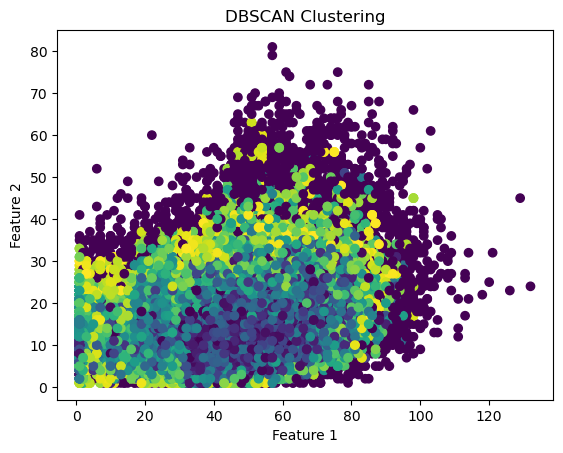

In [28]:
# DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=3)
clustering_labels = dbscan.fit_predict(X)
plot_data(X, clustering_labels, 'DBSCAN Clustering')

In [ ]:
list(set(clustering_labels))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


## Cluster 0

In [ ]:
Xdbscan = data
Xdbscan['etiquetas_columna'] = clustering_labels
grupos = Xdbscan.groupby('etiquetas_columna')
grupo_0 = grupos.get_group(0)
grupo_0.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.0,7.0,7.0,7.000000,7.000000,7.0
mean,1.214562e+08,2.526852e+07,2.285714,4.428571,4.428571,1.571429,41.0,0.142857,1.0,0.0,0.0,0.142857,5.571429,0.0
std,1.053317e+08,2.050224e+07,1.799471,9.071147,3.207135,0.786796,0.0,0.377964,0.0,0.0,0.0,0.377964,2.819997,0.0
min,2.278392e+06,5.918364e+06,1.000000,1.000000,1.000000,1.000000,41.0,0.000000,1.0,0.0,0.0,0.000000,1.000000,0.0
25%,3.532704e+07,9.323793e+06,1.000000,1.000000,1.000000,1.000000,41.0,0.000000,1.0,0.0,0.0,0.000000,4.000000,0.0
50%,1.128892e+08,2.318927e+07,2.000000,1.000000,7.000000,1.000000,41.0,0.000000,1.0,0.0,0.0,0.000000,6.000000,0.0
75%,1.890695e+08,3.430368e+07,2.500000,1.000000,7.000000,2.000000,41.0,0.000000,1.0,0.0,0.0,0.000000,7.500000,0.0
max,2.862329e+08,6.051705e+07,6.000000,25.000000,7.000000,3.000000,41.0,1.000000,1.0,0.0,0.0,1.000000,9.000000,0.0


## Cluster 1

In [ ]:
grupo_1 = grupos.get_group(1)
grupo_1.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,8.100000e+01,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.0,81.000000,81.0,81.000000,81.000000,81.000000,81.000000,81.0
mean,1.674627e+08,5.441898e+07,2.037037,3.481481,5.703704,5.283951,59.0,1.246914,18.0,0.765432,0.259259,0.864198,8.098765,1.0
std,9.879044e+07,3.459652e+07,1.676637,4.056202,3.465705,2.110892,0.0,1.520944,0.0,2.516305,0.997218,1.506263,1.529746,0.0
min,1.491900e+05,1.587060e+05,1.000000,1.000000,1.000000,2.000000,59.0,0.000000,18.0,0.000000,0.000000,0.000000,2.000000,1.0
25%,8.824744e+07,3.181460e+07,1.000000,1.000000,1.000000,4.000000,59.0,0.000000,18.0,0.000000,0.000000,0.000000,7.000000,1.0
50%,1.692831e+08,5.562919e+07,1.000000,3.000000,7.000000,5.000000,59.0,1.000000,18.0,0.000000,0.000000,0.000000,9.000000,1.0
75%,2.258869e+08,8.673962e+07,2.000000,5.000000,7.000000,7.000000,59.0,2.000000,18.0,0.000000,0.000000,1.000000,9.000000,1.0
max,4.243109e+08,1.110341e+08,8.000000,22.000000,17.000000,12.000000,59.0,6.000000,18.0,20.000000,8.000000,7.000000,9.000000,1.0


## Cluster 2

In [ ]:
grupo_2= grupos.get_group(2)
grupo_2.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,1.370000e+02,1.370000e+02,137.000000,137.000000,137.000000,137.000000,137.0,137.000000,137.0,137.000000,137.000000,137.000000,137.000000,137.0
mean,1.773168e+08,5.345996e+07,1.781022,3.788321,5.372263,4.080292,44.0,1.124088,16.0,0.313869,0.313869,0.912409,7.744526,2.0
std,9.727797e+07,3.463535e+07,1.332376,5.296268,2.948098,2.385799,0.0,1.686649,0.0,0.863916,0.990780,1.427021,1.581275,0.0
min,5.003640e+05,2.789190e+05,1.000000,1.000000,1.000000,1.000000,44.0,0.000000,16.0,0.000000,0.000000,0.000000,2.000000,2.0
25%,1.183753e+08,2.405230e+07,1.000000,1.000000,2.000000,2.000000,44.0,0.000000,16.0,0.000000,0.000000,0.000000,7.000000,2.0
50%,1.633583e+08,4.500565e+07,1.000000,1.000000,7.000000,4.000000,44.0,0.000000,16.0,0.000000,0.000000,0.000000,9.000000,2.0
75%,2.288649e+08,8.244238e+07,2.000000,3.000000,7.000000,5.000000,44.0,2.000000,16.0,0.000000,0.000000,1.000000,9.000000,2.0
max,4.249299e+08,1.383543e+08,6.000000,22.000000,17.000000,12.000000,44.0,6.000000,16.0,5.000000,8.000000,7.000000,9.000000,2.0


## Cluster 3

In [ ]:
grupo_3= grupos.get_group(3)
grupo_3.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,8.500000e+01,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.0,85.000000,85.0,85.000000,85.000000,85.000000,85.000000,85.0
mean,1.311460e+08,4.515010e+07,1.611765,3.964706,5.800000,3.082353,51.0,0.658824,8.0,0.388235,0.082353,0.329412,6.694118,3.0
std,1.007018e+08,3.846823e+07,1.337144,6.424371,2.287648,1.983334,0.0,1.097106,0.0,1.543759,0.276533,0.713613,2.149327,0.0
min,1.668000e+04,7.504200e+04,1.000000,1.000000,1.000000,1.000000,51.0,0.000000,8.0,0.000000,0.000000,0.000000,2.000000,3.0
25%,5.600127e+07,6.666165e+06,1.000000,1.000000,6.000000,2.000000,51.0,0.000000,8.0,0.000000,0.000000,0.000000,5.000000,3.0
50%,1.037526e+08,3.631833e+07,1.000000,1.000000,7.000000,3.000000,51.0,0.000000,8.0,0.000000,0.000000,0.000000,7.000000,3.0
75%,1.764845e+08,8.518009e+07,2.000000,3.000000,7.000000,4.000000,51.0,1.000000,8.0,0.000000,0.000000,0.000000,9.000000,3.0
max,4.348733e+08,1.215270e+08,6.000000,27.000000,9.000000,11.000000,51.0,4.000000,8.0,13.000000,1.000000,4.000000,9.000000,3.0


## Cluster 4

In [ ]:
grupo_4= grupos.get_group(4)
grupo_4.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,7.000000e+01,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.0,70.000000,70.000000,70.000000,70.000000,70.0
mean,1.661016e+08,5.897573e+07,2.314286,3.742857,3.557143,3.614286,31.0,1.471429,16.0,0.257143,0.057143,0.685714,7.400000,4.0
std,1.137172e+08,3.792115e+07,1.565413,5.023671,3.251023,2.463018,0.0,1.733903,0.0,0.755381,0.233791,1.499206,1.836821,0.0
min,3.575400e+04,2.790090e+05,1.000000,1.000000,1.000000,1.000000,31.0,0.000000,16.0,0.000000,0.000000,0.000000,3.000000,4.0
25%,8.510643e+07,2.330383e+07,1.000000,1.000000,1.000000,2.000000,31.0,0.000000,16.0,0.000000,0.000000,0.000000,6.000000,4.0
50%,1.379681e+08,6.384742e+07,2.000000,1.000000,1.000000,3.000000,31.0,1.000000,16.0,0.000000,0.000000,0.000000,8.000000,4.0
75%,2.300693e+08,9.001103e+07,3.000000,6.000000,7.000000,5.000000,31.0,2.000000,16.0,0.000000,0.000000,1.000000,9.000000,4.0
max,4.372492e+08,1.804582e+08,8.000000,25.000000,17.000000,12.000000,31.0,6.000000,16.0,4.000000,1.000000,10.000000,9.000000,4.0


## Cluster 5

In [ ]:
grupo_5= grupos.get_group(5)
grupo_5.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,2.800000e+01,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.0,28.000000,28.0,28.000000,28.000000,28.000000,28.000000,28.0
mean,1.703620e+08,5.858344e+07,1.892857,4.214286,5.357143,7.000000,70.0,1.535714,21.0,0.750000,0.321429,0.464286,7.607143,5.0
std,1.195799e+08,3.867341e+07,1.640670,5.188000,2.541715,2.721655,0.0,1.643892,0.0,1.578208,1.188013,0.692935,1.770944,0.0
min,5.584200e+04,7.321500e+04,1.000000,1.000000,1.000000,3.000000,70.0,0.000000,21.0,0.000000,0.000000,0.000000,4.000000,5.0
25%,7.053267e+07,2.224405e+07,1.000000,1.000000,4.250000,4.750000,70.0,0.000000,21.0,0.000000,0.000000,0.000000,6.000000,5.0
50%,1.613731e+08,5.541483e+07,1.000000,1.000000,7.000000,7.000000,70.0,1.000000,21.0,0.000000,0.000000,0.000000,9.000000,5.0
75%,2.362293e+08,9.157630e+07,2.000000,5.250000,7.000000,8.250000,70.0,2.000000,21.0,0.250000,0.000000,1.000000,9.000000,5.0
max,4.331881e+08,1.392415e+08,8.000000,18.000000,7.000000,14.000000,70.0,6.000000,21.0,6.000000,6.000000,2.000000,9.000000,5.0


## Cluster 6

In [ ]:
grupo_6= grupos.get_group(6)
grupo_6.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,2.400000e+01,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.0,24.000000,24.000000,24.00000,24.000000,24.0
mean,1.574139e+08,6.239251e+07,2.166667,3.875000,7.041667,5.666667,73.0,0.416667,12.0,0.583333,0.291667,0.37500,7.833333,6.0
std,1.216414e+08,3.734131e+07,1.926174,4.901752,2.510485,2.807856,0.0,0.775532,0.0,1.529895,0.624094,0.76967,1.833663,0.0
min,6.376800e+04,5.124150e+06,1.000000,1.000000,1.000000,2.000000,73.0,0.000000,12.0,0.000000,0.000000,0.00000,4.000000,6.0
25%,5.966973e+07,2.641586e+07,1.000000,1.000000,7.000000,3.000000,73.0,0.000000,12.0,0.000000,0.000000,0.00000,6.000000,6.0
50%,1.507057e+08,6.458633e+07,1.000000,1.000000,7.000000,5.000000,73.0,0.000000,12.0,0.000000,0.000000,0.00000,9.000000,6.0
75%,2.371888e+08,9.517098e+07,3.000000,6.000000,7.000000,7.000000,73.0,1.000000,12.0,0.000000,0.000000,0.25000,9.000000,6.0
max,4.266810e+08,1.352619e+08,6.000000,23.000000,17.000000,12.000000,73.0,3.000000,12.0,7.000000,2.000000,3.00000,9.000000,6.0


## Cluster 7

In [ ]:
grupo_7= grupos.get_group(7)
grupo_7.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,etiquetas_columna
count,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.0,20.00000,20.000000,20.000000,20.00000,20.0
mean,2.109805e+08,7.575269e+07,2.000000,4.050000,5.100000,8.750000,68.0,2.250000,28.0,1.30000,0.200000,1.000000,9.05000,7.0
std,1.275160e+08,2.941200e+07,1.169795,5.306153,2.731878,3.226127,0.0,1.802776,0.0,3.54074,0.615587,1.891811,1.79106,0.0
min,1.252200e+04,2.183501e+07,1.000000,1.000000,1.000000,3.000000,68.0,0.000000,28.0,0.00000,0.000000,0.000000,6.00000,7.0
25%,1.401610e+08,5.142317e+07,1.000000,1.000000,1.750000,5.750000,68.0,1.000000,28.0,0.00000,0.000000,0.000000,9.00000,7.0
50%,1.782657e+08,8.491951e+07,2.000000,3.000000,7.000000,9.000000,68.0,2.000000,28.0,0.00000,0.000000,0.000000,9.00000,7.0
75%,2.555002e+08,8.999532e+07,2.000000,3.000000,7.000000,11.250000,68.0,3.000000,28.0,1.00000,0.000000,1.000000,9.00000,7.0
max,4.408605e+08,1.216365e+08,6.000000,23.000000,7.000000,13.000000,68.0,6.000000,28.0,16.00000,2.000000,6.000000,16.00000,7.0


3. ¿Qué preguntas consideran importantes que pueden responder con agrupamiento para esa base de datos? ¿Qué han descubierto al analizar los grupos?

A través de los modelos previamente mencionamos, encontramos que pudimos realizar el agrupamiento de dos características que fueron relevantes para nuestro modelo, estas dos características son  'num_lab_procedures' y 'num_medications', através del agrupamiento pudimos capturar la relación tanto sobre la atención médica recibida por los pacientes diabéticos como sobre las características de su tipo de condición diabética.

Dentro del algoritmo de K-Means podemos obtener información de los clusters creados para nuestro modelo, dentro de esta información pudimos notar que dentro del valor promedio de la variable llamada 'time_in_hospital perteneciente al grupo 0 fue de 3.5 dando a entender que el tiempo en el que pasaban en el hospital fue relativamente corta dentro del promedio.

Asimismo, dentro a lo relacionado a la variabilidad de los valores dentro del grupo de características llamada  'num_lab_procedures'  pudimos deducir que se obtuvo un resultado estándar bajo y con ello nos estaría indicando que la mayoría de los pacientes tienen un número similar de procedimiento de laboratorio dentro del grupo 0, en comparación al resto. 

Cuando realizamos la clusterización con el modelo de spectral clustering, podemos percatarnos que el modelo le dio un peso muy alto a ciertas peculiaridades que se repetían en varios datos, sin importar de ninguna manera la forma que tuvieran estos. Tomó datos que compartían ciertas características de manera casi idéntica, y los agrupó en clusters muy pequeños, lo que podemos interpretar como datos que estaban conectados de una manera muy fuerte, que cortaron la conexión con los otros clusters debido a que al algoritmo le pareció o irrelevante o muy distante a comparación.

Al terminar de compilar el modelo de spectral clustering, nos quedaron clusters de tamaños muy desproporcionados, y estos clusters entre más pequeños son, se vuelven más estrictos con las condiciones para formar parte de ellos, mientras que cuando los clusters se vuelven más grandes, las condiciones se vuelven más generales, por lo que las distancias entre sí crecen en gran medida.

Finalmente, en el algoritmo de DBSCAN, encontramos que el algoritmo creó una infinidad de clusters muy pequeños, y gracias al pequeño tamaño de los clusters, el algoritmo puede ser bastante específico con los requisitos para unirse a un cluster, sin embargo, seguramente la cantidad de clusters que se realizó de a pié a modelos sin utilidad, por lo que podemos suponer que este método no es el adecuado para clasificar este tipo de bases de datos.